In [17]:
#!pip install pandas_profiling
#from pandas_profiling import ProfileReport
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import os
import sys
sys.path.insert(0, '../../scripts/')

from helpers import miscellaneous as misc
from helpers import plotters as p

In [21]:
CONFIG = misc.get_config()
PALETTE = CONFIG['COLOR_DISCRETE']

In [3]:
df = pd.read_csv('../../' + CONFIG['RAW_DATA_DIR'] + '/data/tabular_data/PTDEMOG.csv')
df.head()

,Phase,ID,RID,SITEID,VISCODE,VISCODE2,USERDATE,USERDATE2,PTSOURCE,PTGENDER,...,PTTLANG,PTPLANG,PTPSPEC,PTCOGBEG,PTMCIBEG,PTADBEG,PTADDX,PTETHCAT,PTRACCAT,update_stamp
0,ADNI1,18,2,107,sc,sc,2005-08-17,NaN,1,1.0,...,1.0,1.0,-4,NaN,NaN,-4.0,NaN,2.0,5.0,2005-08-17 00:00:00.0
1,ADNI1,20,1,10,f,f,2005-08-18,NaN,1,2.0,...,-4.0,-4.0,-4,NaN,NaN,-4.0,NaN,-4.0,-4.0,2005-08-18 00:00:00.0
2,ADNI1,22,3,107,sc,sc,2005-08-18,NaN,1,1.0,...,1.0,1.0,-4,NaN,NaN,1999.0,NaN,2.0,5.0,2005-08-18 00:00:00.0
3,ADNI1,24,4,10,sc,sc,2005-08-18,NaN,1,1.0,...,2.0,2.0,-4,NaN,NaN,-4.0,NaN,1.0,5.0,2005-08-18 00:00:00.0
4,ADNI1,26,5,107,sc,sc,2005-08-23,NaN,1,1.0,...,1.0,1.0,-4,NaN,NaN,-4.0,NaN,2.0,5.0,2005-08-23 00:00:00.0


In [4]:
#add group label
df_group = pd.read_csv('../../' + CONFIG['RAW_DATA_DIR'] + '/data/images/ADNI1_Complete_1Yr_1.5T_1_20_2022.csv')
df_group.head()

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,I97327,941_S_1311,MCI,M,69,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,3/02/2007,NiFTI,NaN
1,I112538,941_S_1311,MCI,M,70,4,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,6/01/2008,NiFTI,NaN
2,I97341,941_S_1311,MCI,M,70,3,MRI,MPR-R; GradWarp; B1 Correction; N3; Scaled,Processed,9/27/2007,NiFTI,NaN
3,I63874,941_S_1202,CN,M,78,1,MRI,MPR-R; GradWarp; B1 Correction; N3; Scaled,Processed,1/30/2007,NiFTI,NaN
4,I75150,941_S_1202,CN,M,78,3,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,8/24/2007,NiFTI,NaN


In [10]:
df_group['RID'] = df_group.Subject.str.extract('(\d{4})')
df_group['RID'] = df_group['RID'].astype(int)
df_group.head()

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded,RID
0,I97327,941_S_1311,MCI,M,69,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,3/02/2007,NiFTI,NaN,1311
1,I112538,941_S_1311,MCI,M,70,4,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,6/01/2008,NiFTI,NaN,1311
2,I97341,941_S_1311,MCI,M,70,3,MRI,MPR-R; GradWarp; B1 Correction; N3; Scaled,Processed,9/27/2007,NiFTI,NaN,1311
3,I63874,941_S_1202,CN,M,78,1,MRI,MPR-R; GradWarp; B1 Correction; N3; Scaled,Processed,1/30/2007,NiFTI,NaN,1202
4,I75150,941_S_1202,CN,M,78,3,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,8/24/2007,NiFTI,NaN,1202


In [13]:
df = pd.merge(df, df_group[['RID','Group']], on='RID')

In [19]:
# number of unique RIDs
df['RID'].nunique()

639

In [27]:
# unique viscodes
df['VISCODE2'].value_counts()

sc     2921
m60     608
m72     253
m48     202
m12      41
m24      34
m36      28
m18      20
bl       18
m78      17
m66      16
m84      15
m30      13
m06       9
m90       9
m54       4
m42       3
Name: VISCODE2, dtype: int64

,ID,RID,SITEID,PTSOURCE,PTGENDER,PTDOBMM,PTDOBYY,PTHAND,PTMARRY,PTEDUCAT,...,PTNOTRT,PTHOME,PTTLANG,PTPLANG,PTCOGBEG,PTMCIBEG,PTADBEG,PTADDX,PTETHCAT,PTRACCAT
count,4211.000000,4211.000000,4211.000000,4211.000000,3898.000000,3744.000000,3744.000000,3898.000000,4211.000000,3895.000000,...,4206.000000,4211.000000,3898.000000,3898.000000,809.000000,329.000000,2596.000000,814.000000,3898.000000,3898.000000
mean,1247.301354,660.187366,43.557112,1.021848,1.192406,6.677618,1931.140491,0.864289,1.331750,15.010526,...,0.832620,1.588934,0.803232,0.832222,5512.377009,2004.133739,478.653698,8015.991400,1.754233,4.548999
std,836.275673,421.595413,38.649786,0.146203,1.157995,3.486698,6.433617,1.015559,0.824728,4.830155,...,0.546128,1.376719,0.974670,1.007322,3969.853634,2.968388,858.169393,3453.755557,1.173717,1.788621
min,14.000000,3.000000,1.000000,1.000000,-4.000000,1.000000,1916.000000,-4.000000,-4.000000,-4.000000,...,-4.000000,-4.000000,-4.000000,-4.000000,1991.000000,1991.000000,-4.000000,1986.000000,-4.000000,-4.000000
25%,572.000000,284.000000,14.000000,1.000000,1.000000,4.000000,1927.000000,1.000000,1.000000,13.000000,...,1.000000,1.000000,1.000000,1.000000,2004.000000,2003.000000,-4.000000,9999.000000,2.000000,5.000000
50%,1108.000000,671.000000,30.000000,1.000000,1.000000,7.000000,1931.000000,1.000000,1.000000,16.000000,...,1.000000,1.000000,1.000000,1.000000,2007.000000,2005.000000,-4.000000,9999.000000,2.000000,5.000000
75%,1868.000000,1010.000000,57.000000,1.000000,2.000000,10.000000,1935.000000,1.000000,1.000000,18.000000,...,1.000000,2.000000,1.000000,1.000000,9999.000000,2006.000000,-4.000000,9999.000000,2.000000,5.000000
max,3348.000000,1427.000000,127.000000,2.000000,2.000000,12.000000,1952.000000,2.000000,5.000000,20.000000,...,2.000000,8.000000,2.000000,3.000000,9999.000000,2009.000000,2010.000000,9999.000000,3.000000,7.000000


In [18]:
df.head()

,Phase,ID,RID,SITEID,VISCODE,VISCODE2,USERDATE,USERDATE2,PTSOURCE,PTGENDER,...,PTPLANG,PTPSPEC,PTCOGBEG,PTMCIBEG,PTADBEG,PTADDX,PTETHCAT,PTRACCAT,update_stamp,Group
0,ADNI1,22,3,107,sc,sc,2005-08-18,NaN,1,1.0,...,1.0,-4,NaN,NaN,1999.0,NaN,2.0,5.0,2005-08-18 00:00:00.0,AD
1,ADNI1,22,3,107,sc,sc,2005-08-18,NaN,1,1.0,...,1.0,-4,NaN,NaN,1999.0,NaN,2.0,5.0,2005-08-18 00:00:00.0,AD
2,ADNI1,22,3,107,sc,sc,2005-08-18,NaN,1,1.0,...,1.0,-4,NaN,NaN,1999.0,NaN,2.0,5.0,2005-08-18 00:00:00.0,AD
3,ADNI1,24,4,10,sc,sc,2005-08-18,NaN,1,1.0,...,2.0,-4,NaN,NaN,-4.0,NaN,1.0,5.0,2005-08-18 00:00:00.0,MCI
4,ADNI1,24,4,10,sc,sc,2005-08-18,NaN,1,1.0,...,2.0,-4,NaN,NaN,-4.0,NaN,1.0,5.0,2005-08-18 00:00:00.0,MCI


In [ ]:
df.drop(columns=['Phase', 'VISCODE2', 'USERDATE2', ])

## Univariate distributions

### Diagnosis, aka Group

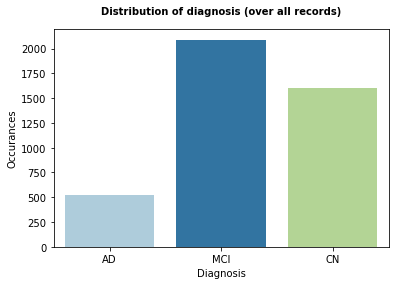

In [28]:
g = sns.countplot(data=df, x='Group', palette=PALETTE)
p.plot_wrapper(g, 'Distribution of diagnosis (over all records)', '', 'Diagnosis', 'Occurances')

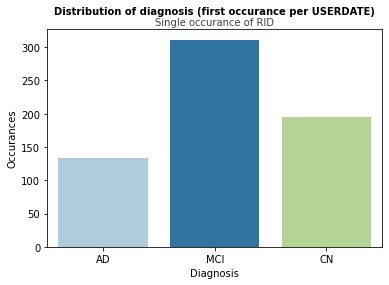

In [35]:
df.sort_values(by='USERDATE', inplace=True)
df_single = df.groupby('RID').first().reset_index()
df_single.drop(columns=['PTWORKHS'], inplace=True) # no values
g = sns.countplot(data=df_single, x='Group', palette=PALETTE)
p.plot_wrapper(g, 'Distribution of diagnosis (first occurances per USERDATE)', 'Single observation of RID', 'Diagnosis', 'Occurances')

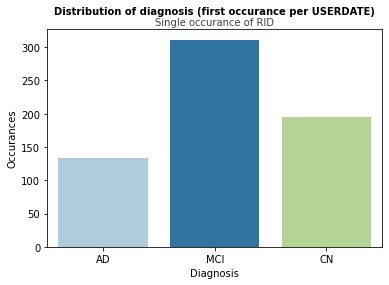

In [36]:
df_single = df.groupby('RID').last().reset_index()
g = sns.countplot(data=df_single, x='Group', palette=PALETTE)
p.plot_wrapper(g, 'Distribution of diagnosis (first occurance per USERDATE)', 'Single observation of RID', 'Diagnosis', 'Occurances')

### Gender

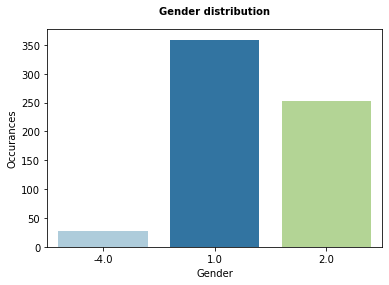

In [39]:
g = sns.countplot(data=df_single, x='PTGENDER', palette=PALETTE)
p.plot_wrapper(g, 'Gender distribution', '-4 indicates missing values', 'Gender', 'Occurances')

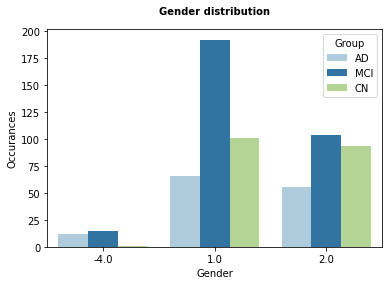

In [41]:
g = sns.countplot(data=df_single, x='PTGENDER', hue = 'Group', palette=PALETTE)
p.plot_wrapper(g, 'Gender distribution', 'Split into diagnosis, -4 indicates missing values', 'Gender', 'Occurances')

### Date of Birth (Month and Year)

In [42]:
df.head()

,Phase,ID,RID,SITEID,VISCODE,VISCODE2,USERDATE,USERDATE2,PTSOURCE,PTGENDER,...,PTPLANG,PTPSPEC,PTCOGBEG,PTMCIBEG,PTADBEG,PTADDX,PTETHCAT,PTRACCAT,update_stamp,Group
0,ADNI1,22,3,107,sc,sc,2005-08-18,NaN,1,1.0,...,1.0,-4,NaN,NaN,1999.0,NaN,2.0,5.0,2005-08-18 00:00:00.0,AD
1,ADNI1,22,3,107,sc,sc,2005-08-18,NaN,1,1.0,...,1.0,-4,NaN,NaN,1999.0,NaN,2.0,5.0,2005-08-18 00:00:00.0,AD
2,ADNI1,22,3,107,sc,sc,2005-08-18,NaN,1,1.0,...,1.0,-4,NaN,NaN,1999.0,NaN,2.0,5.0,2005-08-18 00:00:00.0,AD
3,ADNI1,24,4,10,sc,sc,2005-08-18,NaN,1,1.0,...,2.0,-4,NaN,NaN,-4.0,NaN,1.0,5.0,2005-08-18 00:00:00.0,MCI
4,ADNI1,24,4,10,sc,sc,2005-08-18,NaN,1,1.0,...,2.0,-4,NaN,NaN,-4.0,NaN,1.0,5.0,2005-08-18 00:00:00.0,MCI


In [50]:
df_single.rename(columns={'PTDOBYY':'YEAR', 'PTDOBMM':'MONTH'}, inplace=True)
df_single['DATE'] = pd.to_datetime(df_single[['YEAR', 'MONTH']].assign(DAY=1))
df_single.head()

,RID,Phase,ID,SITEID,VISCODE,VISCODE2,USERDATE,USERDATE2,PTSOURCE,PTGENDER,...,PTPSPEC,PTCOGBEG,PTMCIBEG,PTADBEG,PTADDX,PTETHCAT,PTRACCAT,update_stamp,Group,DATE
0,3,ADNI1,22,107,sc,sc,2005-08-18,None,1,1.0,...,-4,NaN,NaN,1999.0,NaN,2.0,5.0,2005-08-18 00:00:00.0,AD,1924-05-01
1,4,ADNI1,24,10,sc,sc,2005-08-18,None,1,1.0,...,-4,NaN,NaN,-4.0,NaN,1.0,5.0,2005-08-18 00:00:00.0,MCI,1938-01-01
2,5,ADNI1,26,107,sc,sc,2005-08-23,None,1,1.0,...,-4,NaN,NaN,-4.0,NaN,2.0,5.0,2005-08-23 00:00:00.0,CN,1931-12-01
3,6,ADNI1,126,4,sc,sc,2005-11-08,None,1,2.0,...,-4,NaN,NaN,-4.0,NaN,2.0,5.0,2005-11-08 00:00:00.0,MCI,1925-06-01
4,10,ADNI1,108,107,sc,sc,2005-10-27,None,1,2.0,...,-4,NaN,NaN,2000.0,NaN,2.0,5.0,2005-10-27 00:00:00.0,AD,1931-12-01


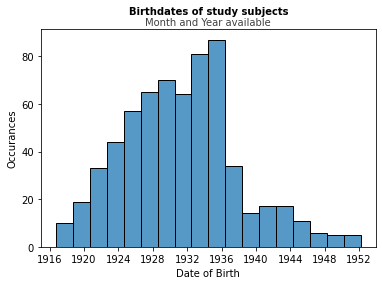

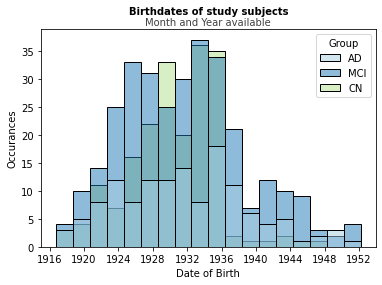

In [56]:
g = sns.histplot(data=df_single, x='DATE', palette=PALETTE)
p.plot_wrapper(g, 'Birthdates of study subjects', 'Month and Year available', 'Date of Birth', 'Occurances')
g = sns.histplot(data=df_single, x='DATE', hue='Group', alpha=.5, palette=PALETTE)
p.plot_wrapper(g, 'Birthdates of study subjects', 'Month and Year available', 'Date of Birth', 'Occurances')

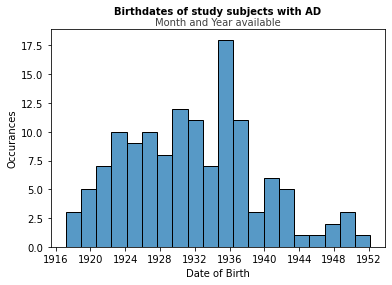

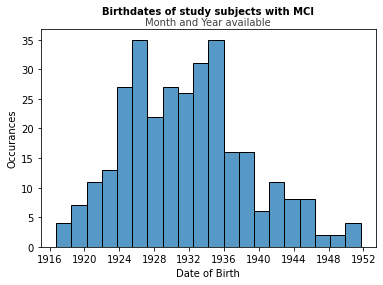

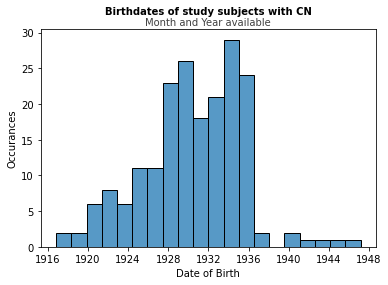

In [59]:
g = sns.histplot(data=df_single[df_single.Group == 'AD'], x='DATE', palette=PALETTE, bins=20)
p.plot_wrapper(g, 'Birthdates of study subjects with AD', 'Month and Year available', 'Date of Birth', 'Occurances')
g = sns.histplot(data=df_single[df_single.Group == 'MCI'], x='DATE', palette=PALETTE, bins=20)
p.plot_wrapper(g, 'Birthdates of study subjects with MCI', 'Month and Year available', 'Date of Birth', 'Occurances')
g = sns.histplot(data=df_single[df_single.Group == 'CN'], x='DATE', palette=PALETTE, bins=20)
p.plot_wrapper(g, 'Birthdates of study subjects with CN', 'Month and Year available', 'Date of Birth', 'Occurances')

### Left- or righthanded? Married or Single?

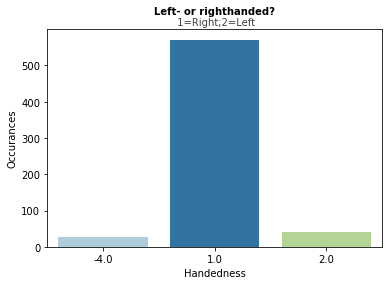

In [62]:
g = sns.countplot(data=df_single, x='PTHAND', palette=PALETTE)
p.plot_wrapper(g, 'Left- or righthanded?', ' 1=Right;2=Left', 'Handedness', 'Occurances')

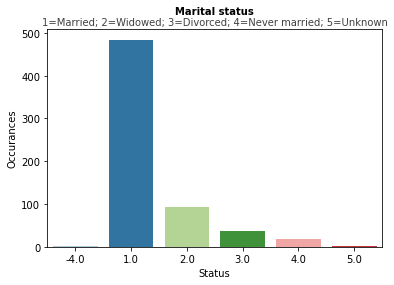

In [64]:
g = sns.countplot(data=df_single, x='PTMARRY', palette=PALETTE)
p.plot_wrapper(g, 'Marital status', '1=Married; 2=Widowed; 3=Divorced; 4=Never married; 5=Unknown', 'Status', 'Occurances')

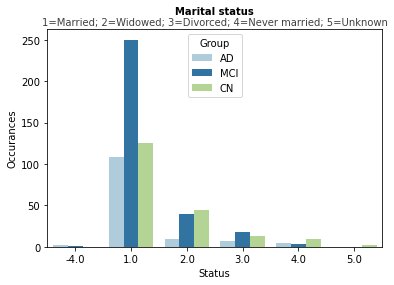

In [65]:
g = sns.countplot(data=df_single, x='PTMARRY', hue='Group', palette=PALETTE)
p.plot_wrapper(g, 'Marital status', '1=Married; 2=Widowed; 3=Divorced; 4=Never married; 5=Unknown', 'Status', 'Occurances')

In [66]:
df_single.head()

,RID,Phase,ID,SITEID,VISCODE,VISCODE2,USERDATE,USERDATE2,PTSOURCE,PTGENDER,...,PTPSPEC,PTCOGBEG,PTMCIBEG,PTADBEG,PTADDX,PTETHCAT,PTRACCAT,update_stamp,Group,DATE
0,3,ADNI1,22,107,sc,sc,2005-08-18,None,1,1.0,...,-4,NaN,NaN,1999.0,NaN,2.0,5.0,2005-08-18 00:00:00.0,AD,1924-05-01
1,4,ADNI1,24,10,sc,sc,2005-08-18,None,1,1.0,...,-4,NaN,NaN,-4.0,NaN,1.0,5.0,2005-08-18 00:00:00.0,MCI,1938-01-01
2,5,ADNI1,26,107,sc,sc,2005-08-23,None,1,1.0,...,-4,NaN,NaN,-4.0,NaN,2.0,5.0,2005-08-23 00:00:00.0,CN,1931-12-01
3,6,ADNI1,126,4,sc,sc,2005-11-08,None,1,2.0,...,-4,NaN,NaN,-4.0,NaN,2.0,5.0,2005-11-08 00:00:00.0,MCI,1925-06-01
4,10,ADNI1,108,107,sc,sc,2005-10-27,None,1,2.0,...,-4,NaN,NaN,2000.0,NaN,2.0,5.0,2005-10-27 00:00:00.0,AD,1931-12-01


### Education and Work

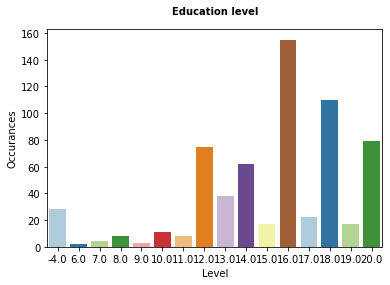

In [68]:
g = sns.countplot(data=df_single, x='PTEDUCAT', palette=PALETTE)
p.plot_wrapper(g, 'Education level', '', 'Level', 'Occurances')

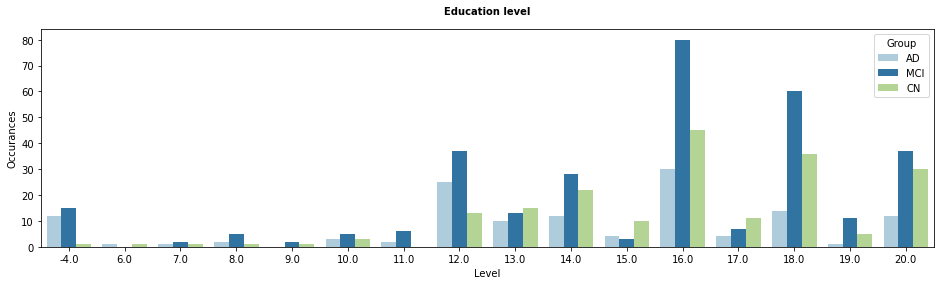

In [70]:
plt.figure(figsize=(16,4))
g = sns.countplot(data=df_single, x='PTEDUCAT', hue='Group', palette=PALETTE)
p.plot_wrapper(g, 'Education level', '', 'Level', 'Occurances')

In [73]:
df_single.PTWORK.str.lower().value_counts()

-4                                52
teacher                           24
homemaker                         18
housewife                         14
engineer                          10
                                  ..
operations                         1
housing specialist                 1
associate professor of nursing     1
secretary - primarily typist       1
telephone company                  1
Name: PTWORK, Length: 388, dtype: int64

In [74]:
df_single[df_single.Group == 'AD'].PTWORK.str.lower().value_counts()

-4                                                   12
homemaker                                             7
housewife                                             5
teacher                                               4
lpn                                                   2
                                                     ..
nys dept of labor field rep                           1
dentist                                               1
secretary - primarily typist                          1
county police officer                                 1
professor of physics, engineering, thermodynamics     1
Name: PTWORK, Length: 100, dtype: int64

### Living situation

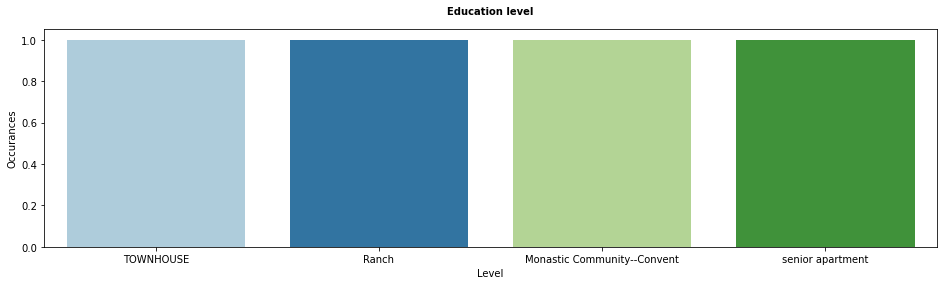

In [79]:
plt.figure(figsize=(16,4))
g = sns.countplot(data=df_single[df_single.PTOTHOME != '-4'], x='PTOTHOME', palette=PALETTE)
p.plot_wrapper(g, 'Housing situation', '', '', 'Occurances')

In [81]:
df_single.drop(columns=['PTOTHOME'], inplace=True)

### Ethnic and racial category

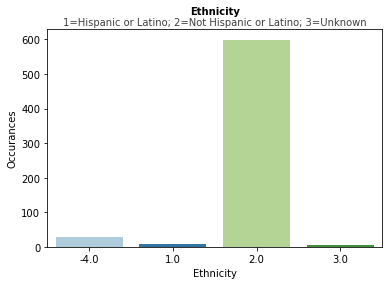

In [85]:
g = sns.countplot(data=df_single, x='PTETHCAT', palette=PALETTE)
p.plot_wrapper(g, 'Ethnicity', '1=Hispanic or Latino; 2=Not Hispanic or Latino; 3=Unknown', 'Ethnicity', 'Occurances')

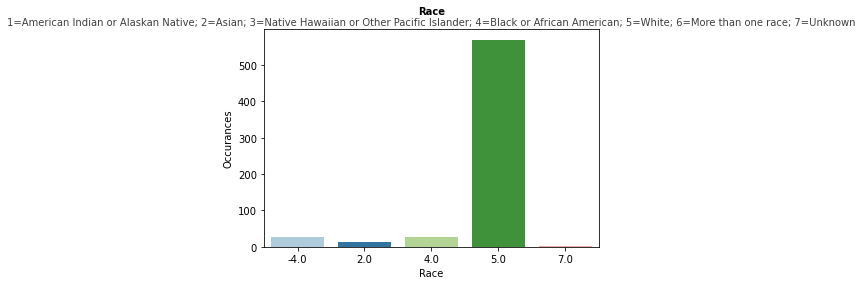

In [90]:
g = sns.countplot(data=df_single, x='PTRACCAT', palette=PALETTE)
p.plot_wrapper(g, 'Race', '1=American Indian or Alaskan Native; 2=Asian; 3=Native Hawaiian or Other Pacific Islander; 4=Black or African American; 5=White; 6=More than one race; 7=Unknown', 'Race', 'Occurances')